In [ ]:
'''
La extracción de los parámetros de cierto modelo pueden tratarse también como problemas de optimización.
En este caso se busca minimizar la llamada función de pérdida.
Así nacen los métodos de escarpadura o gradiente.
En este caso veremos el método de declive estocástico. En el argot anglosajón será "Stochastic gradient descent"
'''

In [2]:
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
from matplotlib import cbook, cm
import numpy as np

In [3]:
# Estudiemos un supuesto artilugio extrasolar bajo diferente condiciones de humedad y exposicion ultravioleta
experimento = [[88, 24], [18, 40], [27, 22], [54, 57], [37, 55], [57, 86], [25, 30], [37, 82], [23, 94], [9, 47], [14, 89], [45, 88], [66, 65], [87, 26], [46, 2], [46, 95], [15, 18], [81, 15], [70, 9], [83, 24], [22, 51], [70, 33], [45, 87], [52, 19], [21, 66], [92, 7], [88, 9], [53, 11], [57, 54], [65, 88], [79, 6], [13, 95], [2, 68], [90, 4], [68, 27], [15, 14], [73, 89], [35, 26], [40, 46], [76, 95], [87, 0], [39, 95], [98, 89], [60, 66], [72, 41], [5, 70], [30, 29], [84, 23], [24, 79], [42, 65], [21, 71], [79, 4], [33, 36], [15, 85], [80, 64], [29, 6], [64, 15], [49, 69], [27, 12], [30, 56], [72, 27], [44, 23], [71, 67], [24, 75], [2, 84], [65, 93], [6, 50], [94, 7], [17, 96], [73, 63], [24, 37], [86, 38], [82, 88], [14, 97], [96, 37], [56, 54], [97, 41], [15, 48], [97, 35], [89, 27]]

In [4]:
# El supuesto estudio detectó una dicotomía
# Visibilidad con el cardinal 0
# Invisibilidad con el cardinal 1
salida = [0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0]

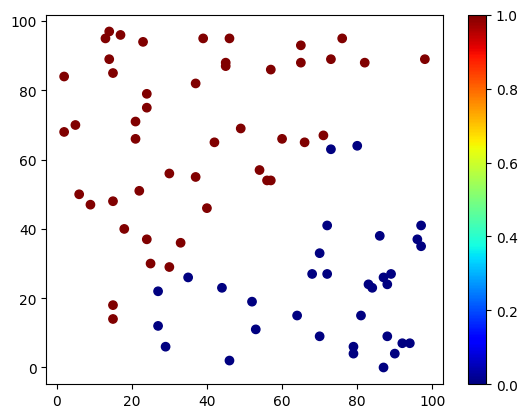

In [5]:
# Observemos la distribución de estas medidas en un plano cartesiano
entrada = np.array(experimento)
e1 = entrada.transpose()[0]
e2 = entrada.transpose()[1]
cs = plt.scatter(e1, e2, c=salida, cmap=cm.jet)
plt.colorbar(cs)
plt.show()

In [18]:
# Inicializamos la rutina del potenciador
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=11)

In [19]:
# Separamos parte de la información para validar el modelo
entrada_ensayo, salida_ensayo = entrada[:60], salida[:60]
entrada_validacion, salida_validacion = entrada[60:], salida[60:]

In [20]:
# Usamos la información restante para desarrollar el modelo 
clf.fit(entrada_ensayo, salida_ensayo)

SGDClassifier(max_iter=11)

In [21]:
# Una vez completado el desarrollo, los parámetros del módelos son calculados, y se puede hacer estimaciones
clf.predict(entrada_validacion)

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0])

In [22]:
# Comparando la estimación con la información real
salida_validacion

[0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0]

In [23]:
# Por último podemos calificar la fiabilidad del modelo
clf.score(entrada_validacion, salida_validacion)

0.95